In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ConvNet grid search

In [8]:
# add encoder_depth

bdd = pd.read_csv("/neurospin/dico/agaudin/Runs/09_new_repo/Output/grid_searches/step3/occipital/supervised_structure/bdd_occipital_convnet.csv", index_col=0)
bdd.loc[bdd.fusioned_latent_space_size == -1, "converter_activation"] = None
bdd

,model_path,best_model_epoch,train_auc,val_auc,test_auc,test_intra_auc,best_train_auc,best_val_auc,best_test_auc,best_test_intra_auc,backbone_output_size,converter_activation,drop_rate,fusioned_latent_space_size,lr,max_angle,projection_head_name,sigma_noise,encoder_depth,train_loss
0,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,1,0.973012,0.487318,0.518423,0.430727,0.705252,0.627859,0.579432,0.612993,32,relu,0.041285,4,0.004464,5,relu,0.169030,1,89.684822
1,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,1,0.964324,0.495218,0.515554,0.511084,0.728735,0.629938,0.589701,0.647167,32,None,0.183185,-1,0.001095,4,relu,0.232218,1,96.417900
2,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0,0.981250,0.543451,0.546361,0.556342,0.745220,0.607069,0.597705,0.580049,32,linear,0.079118,10,0.000115,6,linear,0.211236,2,100.946571
3,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,19,0.500000,0.500000,0.500000,0.500000,0.589085,0.609356,0.552326,0.552494,32,sigmoid,0.064660,10,0.000925,1,sigmoid,0.074499,3,133.803833
4,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,12,0.583154,0.609148,0.534280,0.586823,0.539669,0.674012,0.582905,0.585591,4,None,0.193115,-1,0.000278,0,sigmoid,0.033211,2,134.057785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,10,sigmoid,0.071708,10,0.001865,4,linear,0.375128,1,134.006088
146,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,2,0.584562,0.548025,0.506494,0.614224,0.565902,0.646985,0.590909,0.575431,4,None,0.140379,-1,0.048908,5,relu,0.360923,3,178.091522
147,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,1,0.850926,0.500208,0.538961,0.542488,0.581504,0.644075,0.581546,0.637007,32,None,0.062634,-1,0.034709,2,relu,0.296259,1,559.056030
148,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,0,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,32,sigmoid,0.175805,32,0.011763,6,linear,0.030498,2,134.002930


In [9]:
print("Mean value for the structural grid search: ", bdd.best_test_auc.mean())
gs_config = bdd[(bdd.backbone_output_size == 10) &\
                (bdd.converter_activation == 'relu') &\
                (bdd.fusioned_latent_space_size == 10) &\
                (bdd.projection_head_name == 'relu')]
gs_config

Mean value for the structural grid search:  0.545179200644317


,model_path,best_model_epoch,train_auc,val_auc,test_auc,test_intra_auc,best_train_auc,best_val_auc,best_test_auc,best_test_intra_auc,backbone_output_size,converter_activation,drop_rate,fusioned_latent_space_size,lr,max_angle,projection_head_name,sigma_noise,encoder_depth,train_loss
29,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,6,0.596760,0.541788,0.568559,0.616071,0.590589,0.632017,0.557686,0.611453,10,relu,0.141465,10,0.001970,1,relu,0.011804,3,133.660049
48,/neurospin/dico/agaudin/Runs/09_new_repo/Outpu...,2,0.991808,0.546778,0.543189,0.499076,0.712431,0.628274,0.592419,0.642857,10,relu,0.058012,10,0.003454,0,relu,0.290036,1,70.219704


backbone_output_size


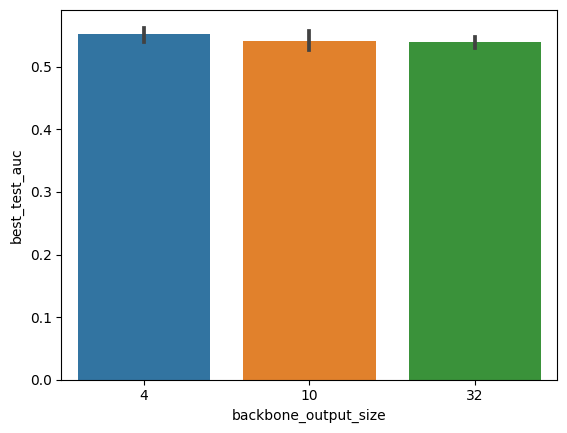

converter_activation


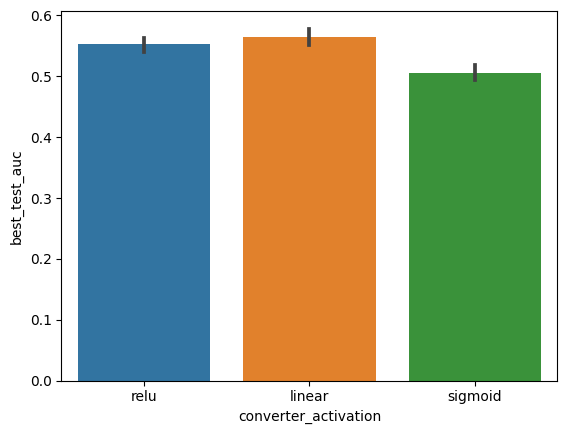

drop_rate


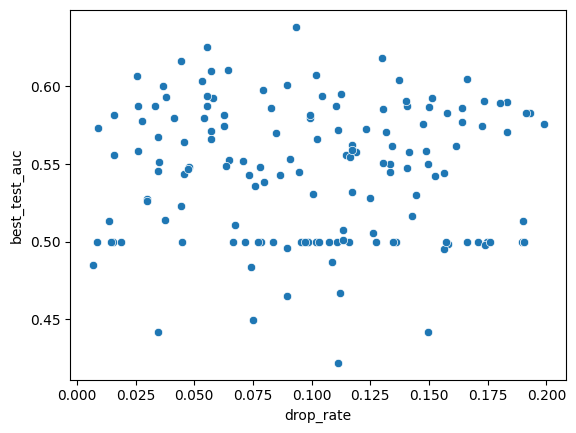

fusioned_latent_space_size


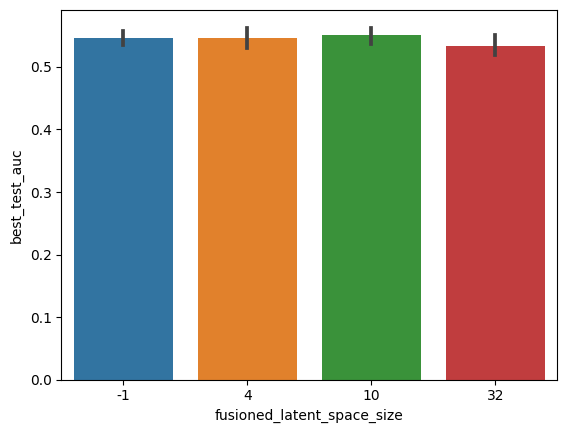

lr


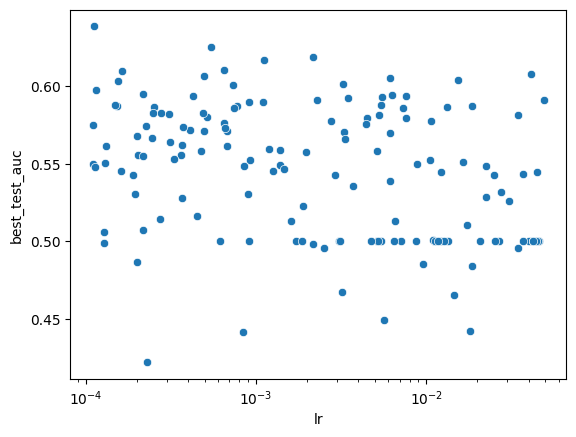

max_angle


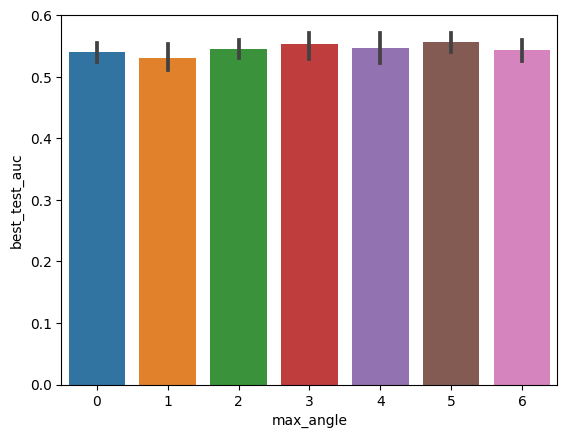

projection_head_name


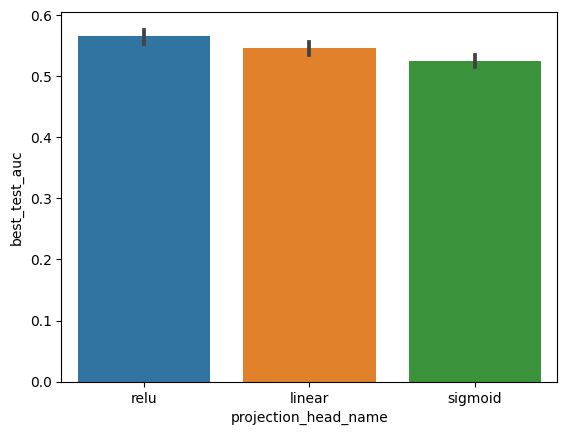

sigma_noise


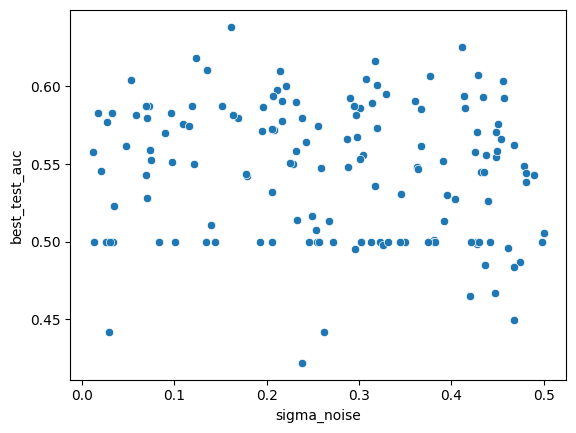

encoder_depth


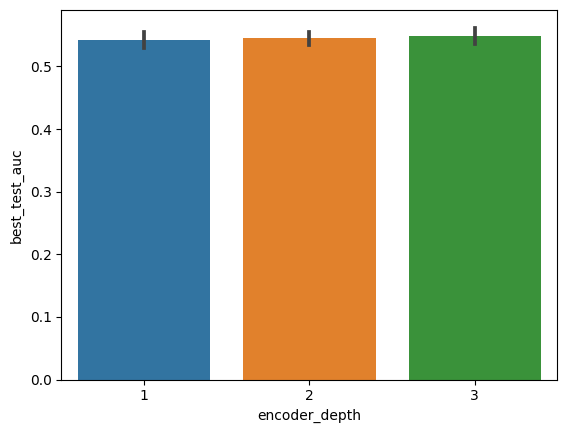

In [16]:
params = ['backbone_output_size', 'converter_activation', 'drop_rate',
          'fusioned_latent_space_size', 'lr', 'max_angle',
          'projection_head_name', 'sigma_noise', 'encoder_depth']

for param in params:
    print(param)
    plt.figure()
    if len(bdd[param].unique()) > 10:
        if param == 'lr':
            plt.xscale('log')
        sns.scatterplot(bdd, x=param, y='best_test_auc')
    else:
        sns.barplot(bdd, x=param, y='best_test_auc')
    plt.show()

27
backbone_output_size


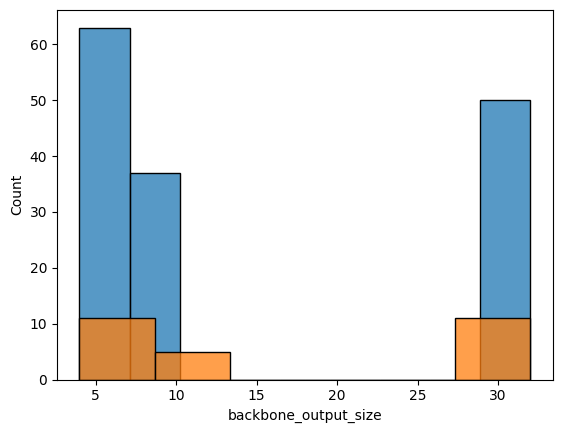

converter_activation


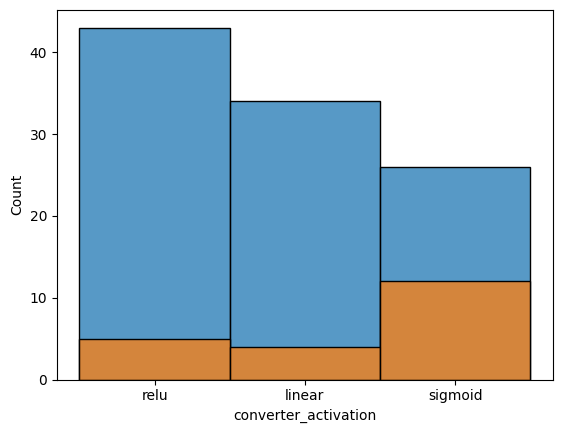

drop_rate


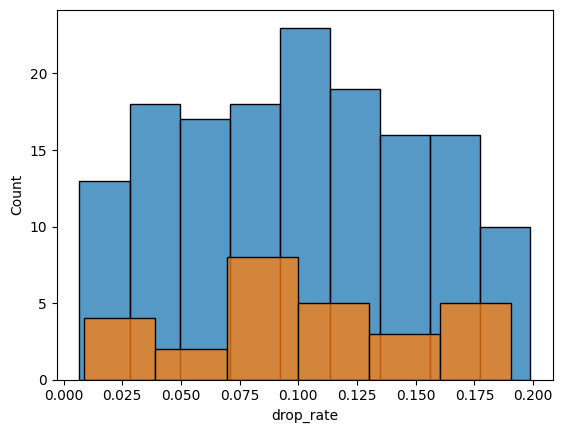

fusioned_latent_space_size


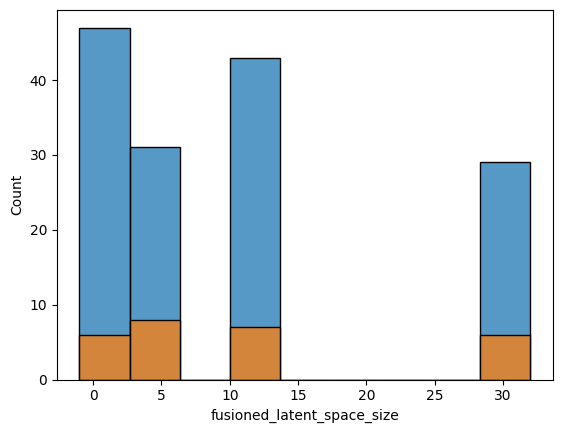

lr


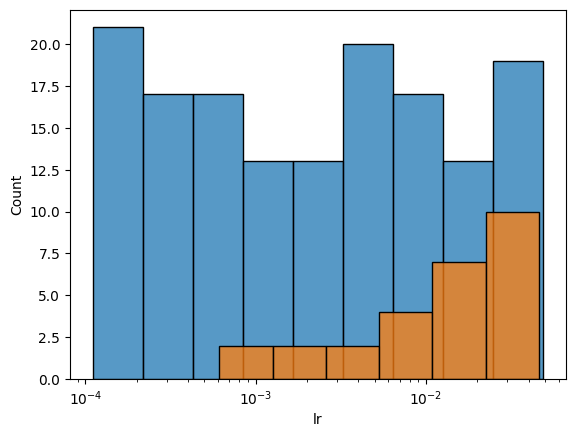

max_angle


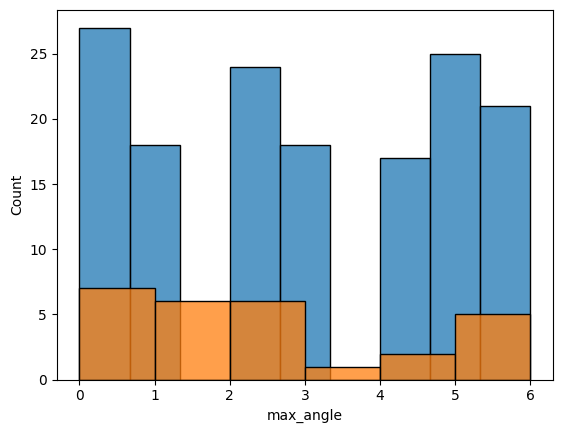

projection_head_name


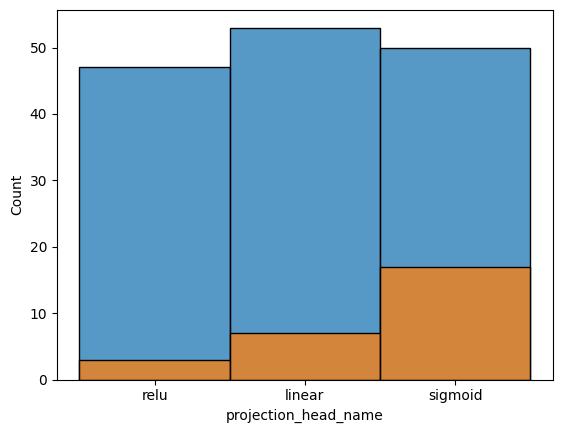

sigma_noise


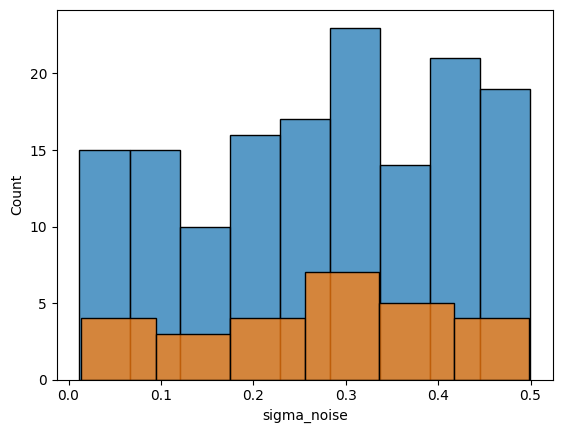

encoder_depth


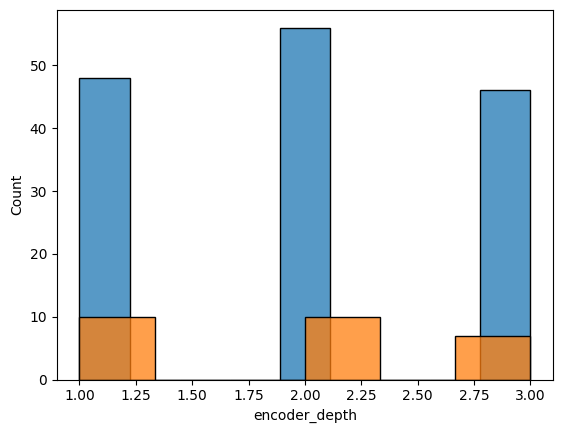

In [22]:
failures = bdd[bdd.best_train_auc == 0.5]
print(failures.shape[0])

for param in params:
    print(param)
    plt.figure()
    if param == 'lr':
        plt.xscale('log')
    sns.histplot(bdd, x=param)
    sns.histplot(failures, x=param)
    plt.show()

# Densenets